In [1]:
__author__ = "Tomás Sánchez Sánchez-Pastor"
__date__   = "06/10/2021"
import numpy as np
from numpy import pi
import matplotlib.pyplot as plt
plt.rc('text',usetex=True)
plt.rc('font',family='serif')
ref_ticksize = 16
plt.rcParams['xtick.labelsize']=ref_ticksize
plt.rcParams['legend.fontsize']=ref_ticksize
plt.rcParams['ytick.labelsize']=ref_ticksize
plt.rcParams['axes.labelsize']=ref_ticksize * 3/2
plt.rcParams['axes.titlesize']=ref_ticksize * 3/2

The quantum partition function of a system with eigenergies $\varepsilon_\nu$ is computed as
$$Z = \sum^\infty_{\nu=0} e^{-\beta \varepsilon_\nu},$$
with $\beta=\frac{1}{k_B T}$, being $k_B$ the Boltzmann's constant. It is closely related with the probability distribution of N particles in the system
$$P(\nu) = \frac{1}{Z}e^{-\beta \varepsilon_\nu}$$

## Harmonic Oscillator

$$\varepsilon_\nu = \hbar \omega(\nu + 1/2)$$

In [92]:
kb   = 1.38064852e-23  # J/K
T    = 1e-9            # K
beta = 1/(kb*T)        # 1/J
hbar = 1.054571817e-34 # J·s
w    = 2*np.pi*14      # rad/s
n    = np.arange(0, 10, 1)
n_list = np.linspace(0, 10)

In [93]:
def eho(nu):
    return hbar*w*(2*nu+1/2)

In [94]:
Zho = np.exp(-beta*hbar*w/2) / (1 - np.exp(-beta*hbar*w)) 
Pho = 1/Zho * np.exp(-beta*eho(n))
Pho_list = 1/Zho * np.exp(-beta*eho(n_list))


____________________
n             P(n)
____________________
0            48.93%
2            12.76%
4            3.33%
6            0.87%
8            0.23%


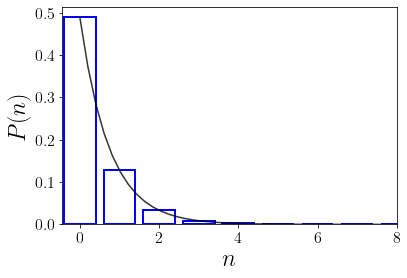

In [105]:
fig, ax = plt.subplots()
ax.bar(n, Pho, edgecolor='b', facecolor='w', lw=2)
ax.plot(n_list, Pho_list, 'k', alpha=0.8)
ax.set_xlabel(r'$n$')
ax.set_ylabel(r'$P(n)$')
ax.set_xlim(-0.45, 8)
print(f'''
____________________
n             P(n)
____________________
0            {round(Pho[0]*100, 2)}%
2            {round(Pho[1]*100, 2)}%
4            {round(Pho[2]*100, 2)}%
6            {round(Pho[3]*100, 2)}%
8            {round(Pho[4]*100, 2)}%''')

## Anharmonic Oscillator (sextic)

$$\varepsilon_\nu = \hbar \omega(\nu + 1/2) - \frac{\hbar^2 \omega^2}{16V}(\nu^2 + \nu + 1/2) + \frac{\hbar^3 \omega^3}{1152V}(4\nu^3 + 6\nu^2 + 8\nu + 3)$$

In [75]:
V = 1.5514861655061523e-10/6.436409310e15

In [76]:
def eah(nu):
    return hbar*w*(2*nu+1/2) - hbar**2*w**2/(16*V)*(4*nu**2+nu+1/2) + hbar**3*w**3/(1152*V)*(32*nu**3 + 24*nu**2 + 16*nu + 3)

In [77]:
Zah = 0
for i in range(20):
    Zah += np.exp(-beta*eah(i))
Pah = 1/Zah * np.exp(-beta*eah(n))


____________________
n             P(n)
____________________
0            48.93%
2            12.76%
4            3.33%
6            0.87%
8            0.23%


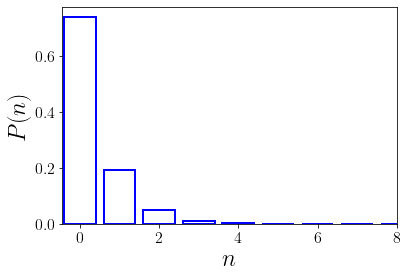

In [106]:
fig, ax = plt.subplots()
ax.bar(n, Pah, edgecolor='b', facecolor='w', lw=2)
ax.set_xlabel(r'$n$')
ax.set_ylabel(r'$P(n)$')
ax.set_xlim(-0.45, 8)
print(f'''
____________________
n             P(n)
____________________
0            {round(Pho[0]*100, 2)}%
2            {round(Pho[1]*100, 2)}%
4            {round(Pho[2]*100, 2)}%
6            {round(Pho[3]*100, 2)}%
8            {round(Pho[4]*100, 2)}%''')

**Conclusion: The anharmonic correction can be neglected when measuring the level probability distribution**